## Ez egy egyszerű példa hely-idő és sebesség-idő függvény számításra.
### Nem mindenütt a leghatékonyabb a megvalósítás, de Pythonban kezdőknek jobban érthető.

In [7]:
# alap beállítás és modulbetöltés
# beágyazott grafikonokhoz:
%matplotlib inline    

import numpy as np    
import matplotlib.pyplot as plt

In [8]:
# időértékek tömbje: t_max, dt időköz
dt=0.01
t_max=10.0
t_tab=np.arange(0.0, t_max, dt, dtype=np.float64)

In [9]:
print("Eleje:", t_tab[:5])
print("Vége: ", t_tab[-5:])

Eleje: [0.   0.01 0.02 0.03 0.04]
Vége:  [9.95 9.96 9.97 9.98 9.99]


In [10]:
# definiálunk néhány hely-idő függvényt gyakorlási célból

# harmonikus rezgőmozgás
def xt_harm(t):  
    return(5*np.sin(3*t))

# csillapodó rezgőmozgás
def xt_csill(t):  
    return(5*np.sin(3*t)*np.exp(-0.2*t))

# egy nem igazi hely-idő függvény szakadással
def xt_szakad(t):
    if t<4:
        return(5*np.sin(t)+3)
    else:
        return(6*np.cos(t))
    
# egy oda-vissza mozgás
def xt_odavissza(t):
    return(5.0*np.exp(-(t-3)**2/(2*0.5**2)))

# egy kis változó frekvenciájú szinusz
def xt_frekvmod(t):
    fr=3.0+0.5*np.sin(t)
    return(5*np.sin(fr*t))

In [11]:
# létrehozzuk a hely-idő függvényértékek tömbjét
x_tab=np.vectorize(xt_csill)(t_tab)            # ez leszervezi helyettünk a ciklust is

print("Eleje: ", x_tab[:5])
print("Vége:  ", x_tab[-5:])

Eleje:  [0.         0.14967785 0.29862315 0.44670446 0.59379165]
Vége:   [-0.68346902 -0.68169689 -0.67931686 -0.67633349 -0.6727519 ]


In [12]:
# most egy általános deriváló függvényt definiálunk, ami tömbökön működik
# a széleken egy oldali deriválttal, máshol centrális deriválttal közelít
# profibbak megoldhatják ezt elegánsan a NumPy vektorizáló műveleteivel

def deriv(xx_tab, ff_tab):  # itt 'xx' az általános 'x' változót jelöli, nem az 'x' helykoordinátát!
    N=xx_tab.shape[0]   # a tömb első dimenziója; hibakezelés nincs
    dff_dxx=np.zeros(N, np.float64)  # a deriváltak tömbje
    for i in range(N):
        if i==0:        # bal széle
            deriv=(ff_tab[1]-ff_tab[0])/(xx_tab[1]-xx_tab[0])
        elif i==N-1:    # jobb széle
            deriv=(ff_tab[N-1]-ff_tab[N-2])/(xx_tab[N-1]-xx_tab[N-2])
        else:          # közepe
            deriv=(ff_tab[i+1]-ff_tab[i-1])/(xx_tab[i+1]-xx_tab[i-1])
        dff_dxx[i]=deriv
    return(dff_dxx)
            

$$\frac{d f}{d x}\approx \frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x},\qquad \mbox{középső elemeken}$$
$$\frac{d f}{d x}\approx \frac{f(x+\Delta x)-f(x)}{\Delta x},\qquad \mbox{bal szélén}$$
$$\frac{d f}{d x}\approx \frac{f(x)-f(x-\Delta x)}{\Delta x},\qquad \mbox{jobb szélén}$$

In [13]:
v_tab=deriv(t_tab, x_tab)  # most már egyszerű sebességet számolni

In [14]:
a_tab=deriv(t_tab, v_tab)  # most már a gyorsulás is könnyen jön

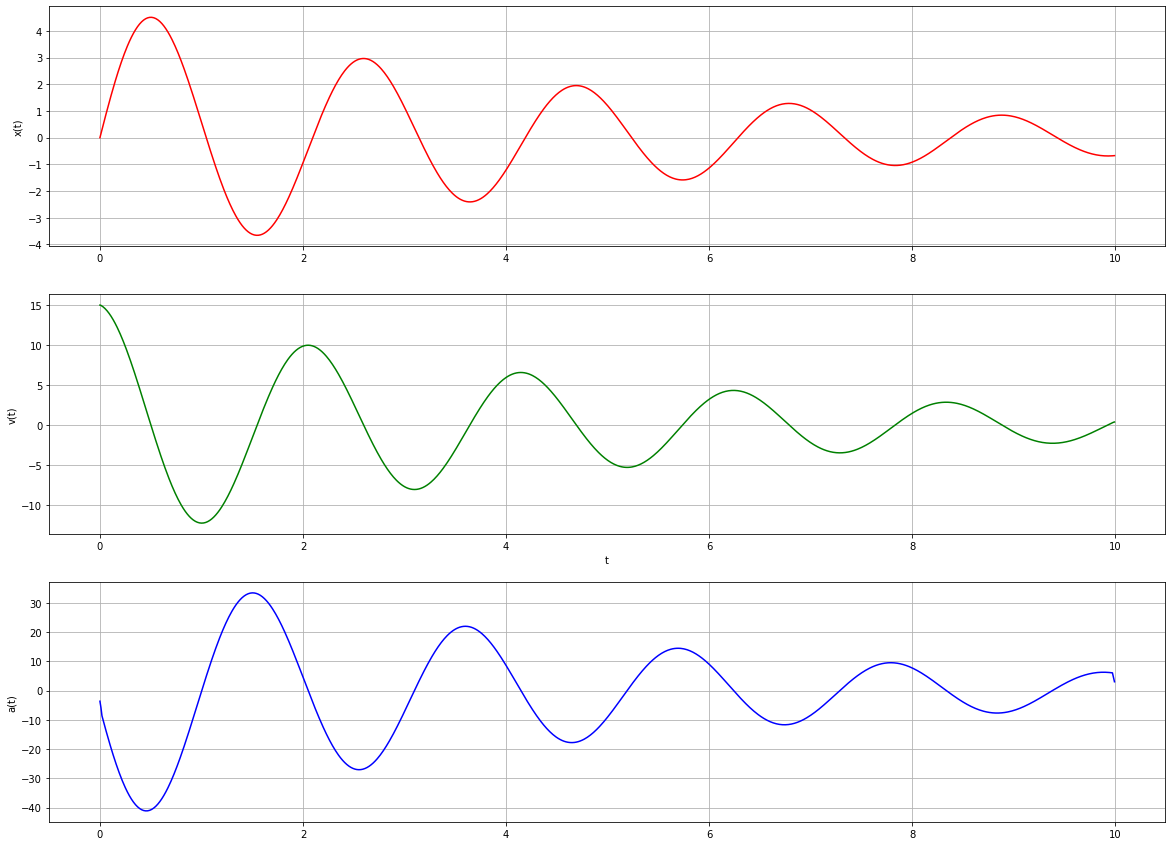

In [15]:
# rajzoljuk ki őket egymás alá
fig=plt.figure(figsize=(20,15))  # nagyobb rajzméret
ax1=fig.add_subplot(311) # három rész-grafikon
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)
ax1.set_ylabel("x(t)")
ax1.plot(t_tab, x_tab, color="red") # az elsőbe az x(t)
ax2.set_ylabel("v(t)")
ax2.plot(t_tab, v_tab, color="green") # a másodikba a v(t)
ax3.set_ylabel("a(t)")
ax2.set_xlabel("t")
ax3.plot(t_tab, a_tab, color="blue") # a harmadikba az a(t)
ax1.grid()
ax2.grid()
ax3.grid()

In [16]:
# most jön a visszafelé számolás
# egyszerű, józan eszes integrálás. lehetne pontosabb is, pl. a Simpson-formulával

def integral(xx_tab, ff_tab, F0=0.0):
    N=xx_tab.shape[0]   # a tömb első dimenziója; hibakezelés nincs
    intff=np.zeros(N, np.float64)  # az integrál értékek tömbje
    intff[0]=F0
    for i in range(1,N):
        intff[i]=intff[i-1]+(xx_tab[i]-xx_tab[i-1])*(ff_tab[i]+ff_tab[i-1])/2.0
    return(intff)

In [17]:
# kipróbáljuk:

v0=15.0  # ez csak önkényes érték! lehet, hogy állítani kell rajta
uj_v_tab=integral(t_tab, a_tab, v0)
x0=0.0
uj_x_tab=integral(t_tab, uj_v_tab, x0)

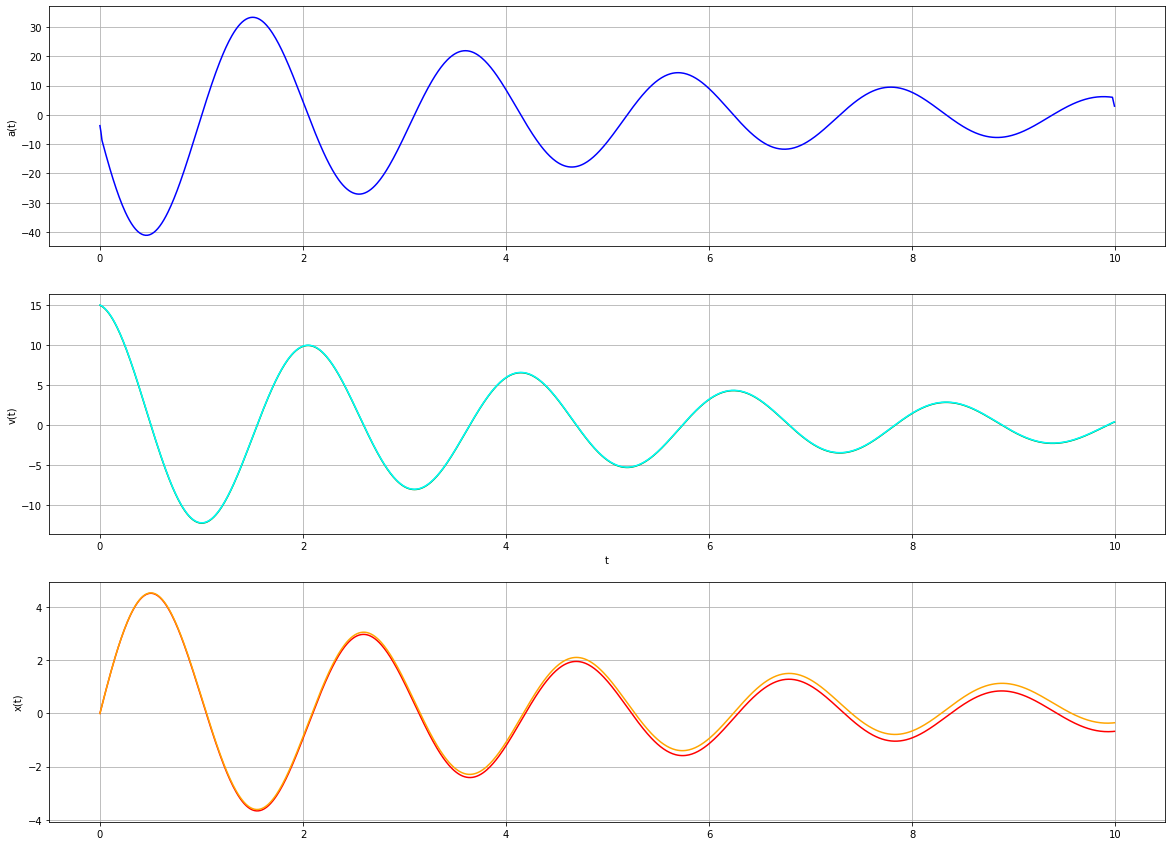

In [18]:
fig=plt.figure(figsize=(20,15))  # nagyobb rajzméret
ax1=fig.add_subplot(313) # három rész-grafikon
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(311)
ax1.set_ylabel("x(t)")
ax1.plot(t_tab, x_tab, color="red") # az elsőbe az x(t)
ax1.plot(t_tab, uj_x_tab, color="orange") # az elsőbe az x(t)
ax2.set_ylabel("v(t)")
ax2.plot(t_tab, v_tab, color="green") # a másodikba a v(t)
ax2.plot(t_tab, uj_v_tab, color="cyan") # a másodikba a v(t)
ax3.set_ylabel("a(t)")
ax2.set_xlabel("t")
ax3.plot(t_tab, a_tab, color="blue") # a harmadikba az a(t)
ax1.grid()
ax2.grid()
ax3.grid()

In [19]:
x_hiba=x_tab-uj_x_tab
print(x_hiba[0:10])

[ 0.00000000e+00 -8.50190679e-05 -3.03964430e-04 -5.61056164e-04
 -8.18855963e-04 -1.07741905e-03 -1.33679976e-03 -1.59705144e-03
 -1.85822647e-03 -2.12037618e-03]


In [20]:
print(x_hiba[-10:])

[-0.31933622 -0.31965772 -0.31997894 -0.32029989 -0.32062057 -0.32094097
 -0.3212611  -0.32158097 -0.32186354 -0.32199843]


## Most tegyünk rá egy kis zajt!

In [21]:
a_zajos=a_tab + 2*np.random.uniform(-1,1,a_tab.shape)

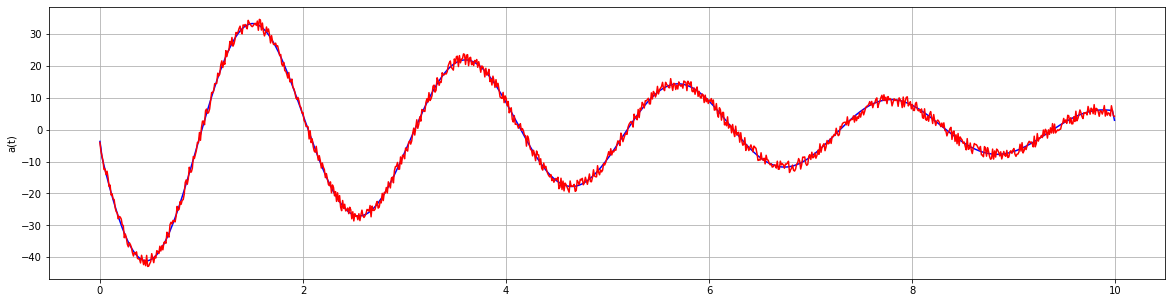

In [22]:
fig=plt.figure(figsize=(20,5))  # nagyobb rajzméret
ax1=fig.add_subplot(111) 
ax1.plot(t_tab, a_tab, color="blue") 
ax1.plot(t_tab, a_zajos, color="red") 
ax1.set_ylabel("a(t)")
ax1.grid()


In [23]:
# kipróbáljuk: most a zajosból számolunk

v0=15.0  # ez csak önkényes érték! lehet, hogy állítani kell rajta
uj_v_tab=integral(t_tab, a_zajos, v0)
x0=0.0
uj_x_tab=integral(t_tab, uj_v_tab, x0)

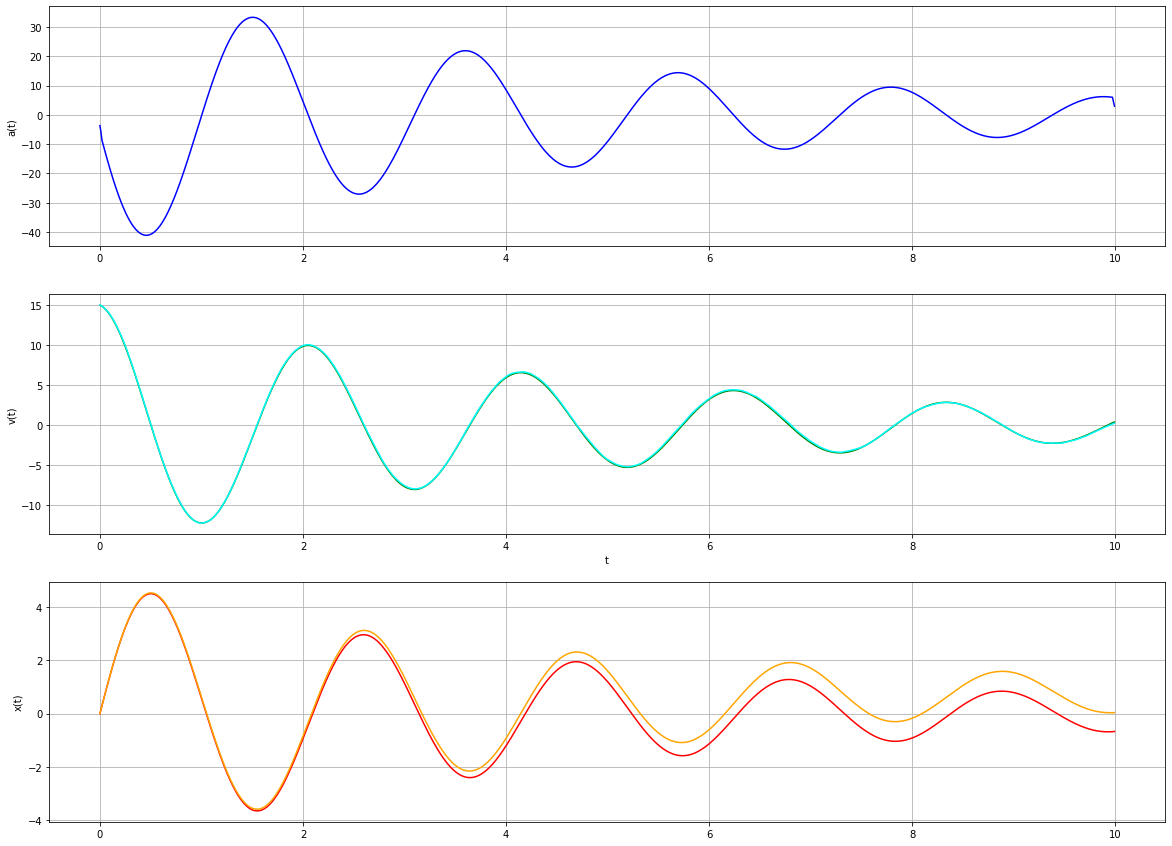

In [24]:
fig=plt.figure(figsize=(20,15))  # nagyobb rajzméret
ax1=fig.add_subplot(313) # három rész-grafikon
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(311)
ax1.set_ylabel("x(t)")
ax1.plot(t_tab, x_tab, color="red") # az elsőbe az x(t)
ax1.plot(t_tab, uj_x_tab, color="orange") # az elsőbe az x(t)
ax2.set_ylabel("v(t)")
ax2.plot(t_tab, v_tab, color="green") # a másodikba a v(t)
ax2.plot(t_tab, uj_v_tab, color="cyan") # a másodikba a v(t)
ax3.set_ylabel("a(t)")
ax2.set_xlabel("t")
ax3.plot(t_tab, a_tab, color="blue") # a harmadikba az a(t)
ax1.grid()
ax2.grid()
ax3.grid()